<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20BDD100K%20dataset%20with%20TensorRT%20optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to detect vehicles on road



## 3. How to train using Tensorflow object detection API wrapper and BDD100K dataset



## 4. Model optimization using TensorRT



## 5. Inferecing on unoptimized and optimized models

##  More examples on 
  - Tensorflow object detection API 1.0 - https://github.com/Tessellate-Imaging/Monk_Object_Detection/tree/master/example_notebooks/12_tf_obj_1
  - Tensorflow object detection API 2.0 - https://github.com/Tessellate-Imaging/Monk_Object_Detection/tree/master/example_notebooks/13_tf_obj_2 

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/13_tf_obj_2/installation
     
 - Select the right file and run
 
     - chmod +x install_cuda10.sh && ./install_cuda10.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/13_tf_obj_2/installation && chmod +x install_colab.sh && ./install_colab.sh
# Restart colab runtime now

# For Local systems and cloud select the right CUDA version
# ! cd Monk_Object_Detection/13_tf_obj_2/installation && chmod +x install_cuda10.sh && ./install_cuda10.sh

In [ ]:
# Check TF version
import tensorflow as tf
print(tf.__version__)

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ukYu1AVfQ5SAmKeiXXYM9vvZJN6ZaV4Q' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ukYu1AVfQ5SAmKeiXXYM9vvZJN6ZaV4Q" -O obj_bdd_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq obj_bdd_trained.zip

In [4]:
# For unoptimized model uncomment the following
#gtf.set_model_params(exported_model_dir = 'obj_bdd_trained/export_dir')

# For tensorRT optimized model uncomment the following
gtf.set_model_params(exported_model_dir = 'obj_bdd_trained/trt_dir_int')

Image loading and preproc time - 0.017968416213989258
Inference time - 2.2490639686584473
Extracting results and priting on image time - 0.0376889705657959


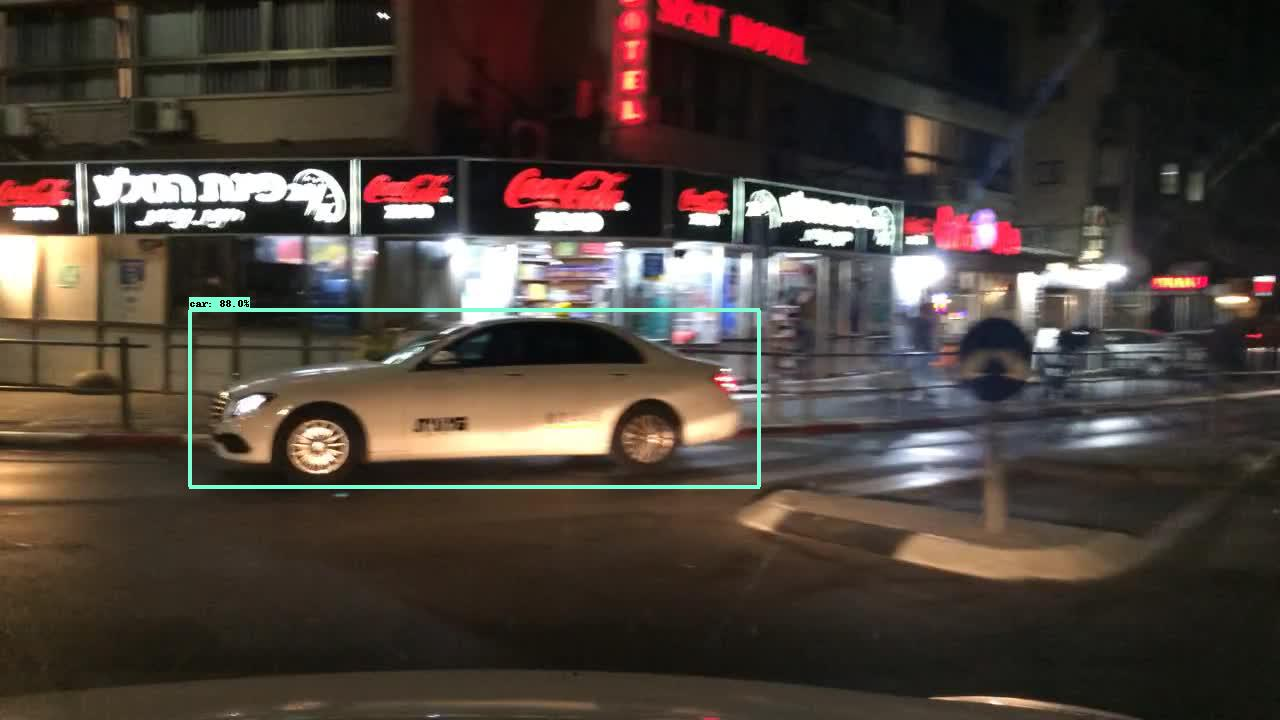

In [5]:
scores, bboxes, labels = gtf.infer_on_image('obj_bdd_trained/test/1.jpg', thresh=0.5);
from IPython.display import Image
Image(filename='output.jpg') 

Image loading and preproc time - 0.013666868209838867
Inference time - 0.01823282241821289
Extracting results and priting on image time - 0.05319070816040039


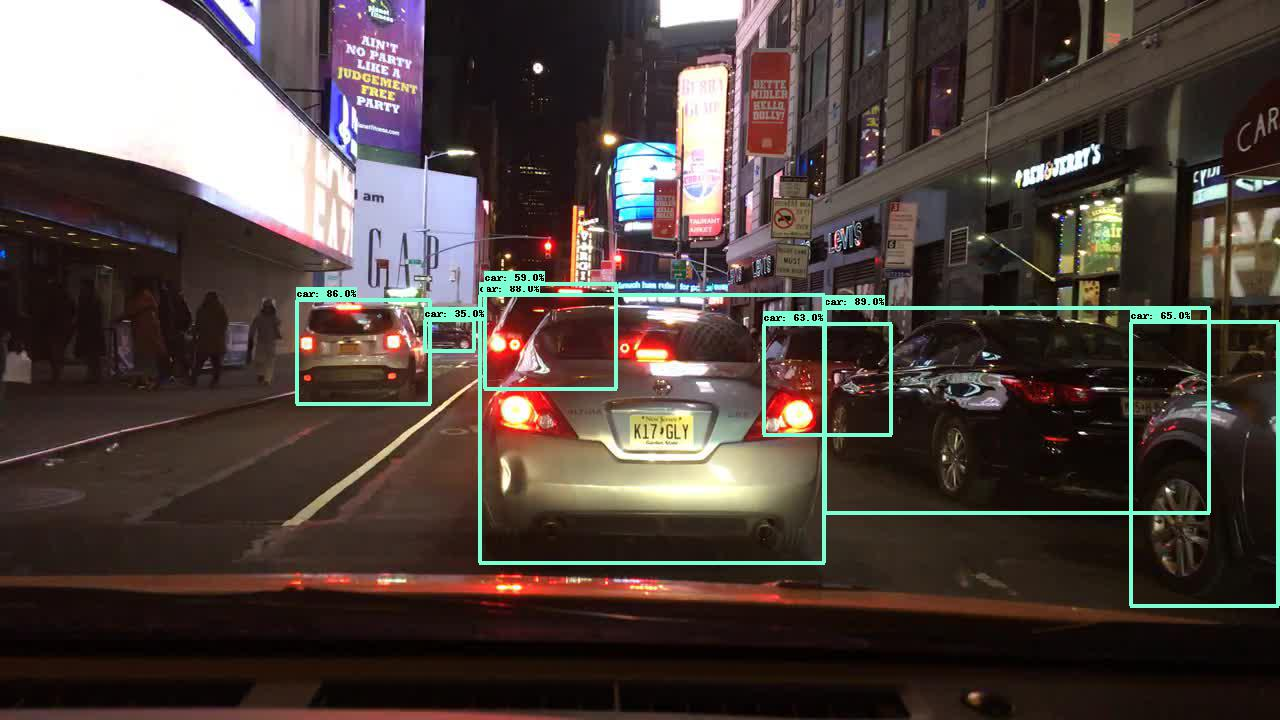

In [7]:
scores, bboxes, labels = gtf.infer_on_image('obj_bdd_trained/test/2.jpg', thresh=0.3);
from IPython.display import Image
Image(filename='output.jpg') 

Image loading and preproc time - 0.013952255249023438
Inference time - 0.018201112747192383
Extracting results and priting on image time - 0.049465179443359375


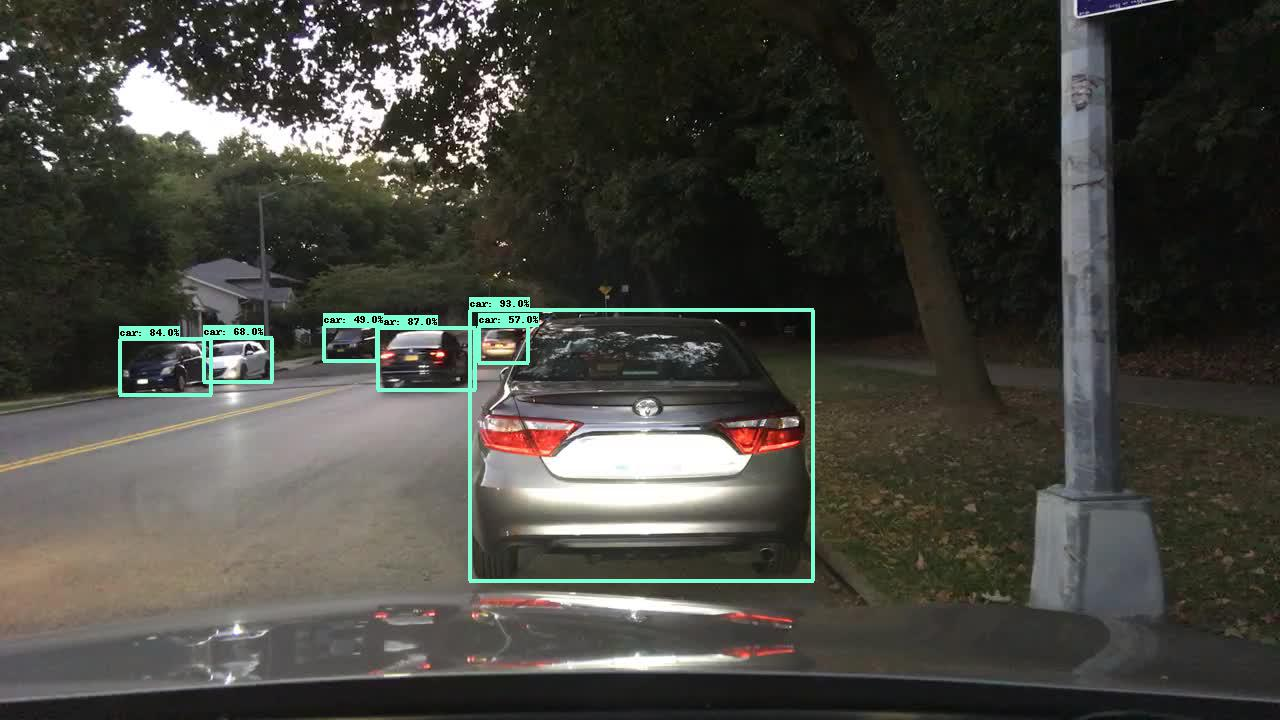

In [9]:
scores, bboxes, labels = gtf.infer_on_image('obj_bdd_trained/test/3.jpg', thresh=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

# Dataset download
  - Dataset credits: - https://www.kaggle.com/solesensei/solesensei_bdd100k

In [1]:
! pip install kaggle

In [3]:
! kaggle datasets download solesensei/solesensei_bdd100k

100%|█████████████████████████████████████▉| 7.60G/7.61G [03:16<00:00, 81.4MB/s]
100%|██████████████████████████████████████| 7.61G/7.61G [03:16<00:00, 41.5MB/s]


In [4]:
! unzip -qq solesensei_bdd100k.zip

In [10]:
ls bdd100k/bdd100k

images/


In [13]:
ls bdd100k_labels_release/bdd100k/labels

bdd100k_labels_images_train.json  bdd100k_labels_images_val.json


In [16]:
! mkdir dataset

! mkdir dataset/train/
! mkdir dataset/train/annos/

! mkdir dataset/val/
! mkdir dataset/val/annos/

In [1]:
! find bdd100k/bdd100k/images/100k/train/trainA/ -name '*.jpg*' -exec mv {} bdd100k/bdd100k/images/100k/train/ \;

In [2]:
! find bdd100k/bdd100k/images/100k/train/trainB/ -name '*.jpg*' -exec mv {} bdd100k/bdd100k/images/100k/train/ \;

In [9]:
! find bdd100k/bdd100k/images/100k/train/testA/ -name '*.jpg*' -exec mv {} bdd100k/bdd100k/images/100k/train/ \;

In [10]:
! find bdd100k/bdd100k/images/100k/train/testB/ -name '*.jpg*' -exec mv {} bdd100k/bdd100k/images/100k/train/ \;

In [30]:
! pip install pascal-voc-writer

In [1]:
img_dir = "bdd100k/bdd100k/images/100k/train/";
anno_file = "bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json";
output_dir = "dataset/train/annos/";

In [2]:
import json
with open(anno_file) as json_file:
    data = json.load(json_file)

In [3]:
len(data)

69863

In [4]:
data[0].keys()

dict_keys(['name', 'attributes', 'timestamp', 'labels'])

In [5]:
from pascal_voc_writer import Writer

In [15]:
import os
from tqdm import tqdm
import cv2

for i in tqdm(range(len(data))):
    name = data[i]["name"];
    labels = data[i]["labels"];
    #print(img_dir + "/" + name)
    img = cv2.imread(img_dir + "/" + name);
    h, w, c = img.shape;
    writer = Writer(name, w, h)
    for j in range(len(labels)):
        obj = labels[j];
        if("box2d" in obj.keys()):
            category = obj["category"];
            x1 = int(obj["box2d"]["x1"]);
            y1 = int(obj["box2d"]["y1"]);
            x2 = int(obj["box2d"]["x2"]);
            y2 = int(obj["box2d"]["y2"]);
            writer.addObject(category, x1, y1, x2, y2);
    
    writer.save(output_dir + "/" + name.split(".")[0] + ".xml")

        
    #break;

100%|██████████| 69863/69863 [15:09<00:00, 76.82it/s]


In [16]:
img_dir = "bdd100k/bdd100k/images/100k/val/";
anno_file = "bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json";
output_dir = "dataset/val/annos/";

In [17]:
import json
with open(anno_file) as json_file:
    data = json.load(json_file)

In [18]:
len(data)

10000

In [19]:
from pascal_voc_writer import Writer

In [20]:
import os
from tqdm import tqdm
import cv2

for i in tqdm(range(len(data))):
    name = data[i]["name"];
    labels = data[i]["labels"];
    #print(img_dir + "/" + name)
    img = cv2.imread(img_dir + "/" + name);
    h, w, c = img.shape;
    writer = Writer(name, w, h)
    for j in range(len(labels)):
        obj = labels[j];
        if("box2d" in obj.keys()):
            category = obj["category"];
            x1 = int(obj["box2d"]["x1"]);
            y1 = int(obj["box2d"]["y1"]);
            x2 = int(obj["box2d"]["x2"]);
            y2 = int(obj["box2d"]["y2"]);
            writer.addObject(category, x1, y1, x2, y2);
    
    writer.save(output_dir + "/" + name.split(".")[0] + ".xml")

        
    #break;

100%|██████████| 10000/10000 [02:10<00:00, 76.85it/s]


In [5]:
# Get classes

In [1]:
anno_file = "bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json";
import json
with open(anno_file) as json_file:
    data = json.load(json_file)

In [2]:
import os
from tqdm import tqdm
import cv2
classes = [];

for i in tqdm(range(len(data))):
    name = data[i]["name"];
    labels = data[i]["labels"];
    for j in range(len(labels)):
        obj = labels[j];
        if("box2d" in obj.keys()):
            category = obj["category"];
            if(category not in classes):
                classes.append(category)

100%|██████████| 69863/69863 [00:00<00:00, 96579.03it/s]


In [3]:
classes

['traffic light',
 'traffic sign',
 'car',
 'person',
 'bus',
 'truck',
 'rider',
 'bike',
 'motor',
 'train']

In [5]:
f = open("classes.txt", 'w');
for i in range(len(classes)):
    f.write(classes[i] + "\n");
f.close();

# Training your own network

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
gtf.list_models();

1. Model Name: ssd_mobilenet_v2_320
2. Model Name: ssd_mobilenet_v1_fpn_640
3. Model Name: ssd_mobilenet_v2_fpnlite_320
4. Model Name: ssd_mobilenet_v2_fpnlite_640
5. Model Name: ssd_resnet50_v1_fpn_320
6. Model Name: ssd_resnet50_v1_fpn_640
7. Model Name: ssd_resnet101_v1_fpn_320
8. Model Name: ssd_resnet101_v1_fpn_640
9. Model Name: ssd_resnet152_v1_fpn_320
10. Model Name: ssd_resnet152_v1_fpn_640
11. Model Name: faster_rcnn_resnet50_v1_640
12. Model Name: faster_rcnn_resnet50_v1_1024
13. Model Name: faster_rcnn_resnet101_v1_640
14. Model Name: faster_rcnn_resnet101_v1_1024
15. Model Name: faster_rcnn_resnet152_v1_640
16. Model Name: faster_rcnn_resnet152_v1_1024
17. Model Name: faster_rcnn_inception_resnet_v2_640
18. Model Name: faster_rcnn_inception_resnet_v2_1024
19. Model Name: efficientdet_d0
20. Model Name: efficientdet_d1
21. Model Name: efficientdet_d2
22. Model Name: efficientdet_d3
23. Model Name: efficientdet_d4
24. Model Name: efficientdet_d5
25. Model Name: efficientdet_

In [ ]:
# Dataset details

In [5]:
train_img_dir = "bdd100k/bdd100k/images/100k/train/";
train_anno_dir = "dataset/train/annos/";
class_list_file = "classes.txt";

gtf.set_train_dataset(train_img_dir, train_anno_dir, class_list_file, batch_size=4)

In [6]:
val_img_dir = "bdd100k/bdd100k/images/100k/val/";
val_anno_dir = "dataset/val/annos/";

gtf.set_val_dataset(val_img_dir, val_anno_dir)

In [7]:
# Create tf record

In [8]:
gtf.create_tfrecord(data_output_dir="data_tfrecord")

Training tfrecord already present at data_tfrecord/train.record.
Validation tfrecord already present at data_tfrecord/val.record.


In [9]:
# Model and hyper params

In [10]:
gtf.set_model_params(model_name="ssd_resnet50_v1_fpn_640")

Model Download
Model name set as ssd_resnet50_v1_fpn_640x640_coco17_tpu-8


In [11]:
gtf.set_hyper_params(num_train_steps=100000, lr=0.03)

In [12]:
# Directory to store inference graph

In [13]:
gtf.export_params(output_directory="export_dir");

In [14]:
# (Optional) Optimize using TensorRT - Feature Not tested on colab

In [15]:
gtf.TensorRT_Optimization_Params(conversion_type="INT8", trt_dir="trt_dir_int")

In [ ]:
# training
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/13_tf_obj_2/lib/train.py
# or
# Run the following command from notebook

In [ ]:
%run Monk_Object_Detection/13_tf_obj_2/lib/train.py

In [ ]:
# exportaing trained model
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/13_tf_obj_2/lib/export.py
# or
# Run the following command from notebook

In [ ]:
%run Monk_Object_Detection/13_tf_obj_2/lib/export.py

In [ ]:
# Optimizing For TensorRT - Feature Not tested on colab
# This requires TensorRT 6.0.1 to be installed
# Go to https://developer.nvidia.com/tensorrt
# Download 
#  - nv-tensorrt-repo-ubuntu1804-cuda10.1-trt6.0.1.5-ga-20190913_1-1_amd64.deb (For Ubuntu18.04)
#  - nv-tensorrt-repo-ubuntu1604-cuda10.1-trt6.0.1.5-ga-20190913_1-1_amd64.deb (For Ubuntu16.04)
# Run the following commands to install trt (in a terminal)
# $ sudo dpkg -i nv-tensorrt-repo-ubuntu1804-cuda10.1-trt6.0.1.5-ga-20190913_1-1_amd64.deb
# $ sudo apt-key add /var/nv-tensorrt-repo-cuda10.1-trt6.0.1.5-ga-20190913/7fa2af80.pub
# $ sudo apt-get update
# $ sudo apt-get install tensorrt
# $ sudo apt-get install uff-converter-tf
# $ sudo apt-get install python3-libnvinfer-dev

In [1]:
%run Monk_Object_Detection/13_tf_obj_2/lib/optimize.py

INFO:tensorflow:Linked TensorRT version: (6, 0, 1)
INFO:tensorflow:Loaded TensorRT version: (6, 0, 1)
image_size =  640
INFO:tensorflow:Assets written to: trt_dir_int/saved_model/assets


# Inference on exported model (Unoptimized)

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.set_model_params(exported_model_dir = 'export_dir')

In [5]:
import os
img_list = os.listdir("bdd100k/bdd100k/images/100k/test/")

In [6]:
len(img_list)

293

In [ ]:
scores, bboxes, labels = gtf.infer_on_image('bdd100k/bdd100k/images/100k/test/' + img_list[0], thresh=0.5);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
scores, bboxes, labels = gtf.infer_on_image('bdd100k/bdd100k/images/100k/test/' + img_list[10], thresh=0.3);
from IPython.display import Image
Image(filename='output.png') 

In [7]:
gtf.benchmark_for_speed('bdd100k/bdd100k/images/100k/test/' + img_list[10])

Average Image loading time: 0.01160893201828003
Average Inference time: 0.03466294050216675
Result extraction time: 0.08286280155181885
total_time = 3.466294050216675
images_per_sec = 28
99th_percentile = 36.33475303649902
latency_mean  = 34.66294050216675
latency_median = 34.737467765808105
latency_min = 32.674551010131836


# Inference on TensorRT optimized model

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.set_model_params(exported_model_dir = 'trt_dir_int')

In [5]:
import os
img_list = os.listdir("bdd100k/bdd100k/images/100k/test/")

In [6]:
len(img_list)

293

In [8]:
scores, bboxes, labels = gtf.infer_on_image('bdd100k/bdd100k/images/100k/test/' + img_list[0], thresh=0.5);

Image loading and preproc time - 0.01483464241027832
Inference time - 0.019663572311401367
Extracting results and priting on image time - 0.04001164436340332


In [9]:
scores, bboxes, labels = gtf.infer_on_image('bdd100k/bdd100k/images/100k/test/' + img_list[10], thresh=0.3);

Image loading and preproc time - 0.014383077621459961
Inference time - 0.01693415641784668
Extracting results and priting on image time - 0.08312678337097168


In [7]:
gtf.benchmark_for_speed('bdd100k/bdd100k/images/100k/test/' + img_list[10])

Average Image loading time: 0.011514503955841065
Average Inference time: 0.0170498251914978
Result extraction time: 0.0828728723526001
total_time = 1.7049825191497803
images_per_sec = 58
99th_percentile = 18.044471740722656
latency_mean  = 17.049825191497803
latency_median = 16.902923583984375
latency_min = 16.246795654296875
